## Linear regessions With Heart Failure Prediction
> About this dataset
    Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
    Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

    Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

    People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
# import pakage
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df['sex']=df.sex.map({1:"Woman",0:"Man"})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,Woman,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,Woman,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,Woman,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,Woman,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,Man,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 30.5+ KB


In [4]:
# count the nan 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.00000,285.000000,1.00000


In [6]:
'''
create useful list of feature name for easy analytic
'''
# refence https://greatdayhr.com/id-id/blog/data-diskrit-adalah/
# kita ambil data untuk mempermudah 
conti_data=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']# data yang dapat di ukur
discrits_data=['anaemia','diabetes',"high_blood_pressure",'sex','smoking']# data xyang bisa hitung

/tmp/ipykernel_2829/3518770650.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins=20,color='green')
/tmp/ipykernel_2829/3518770650.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],bins=20,color='green')
/tmp/ipykernel_2829/3518770650.py:8: UserWarning: 

`distplot` is a depr

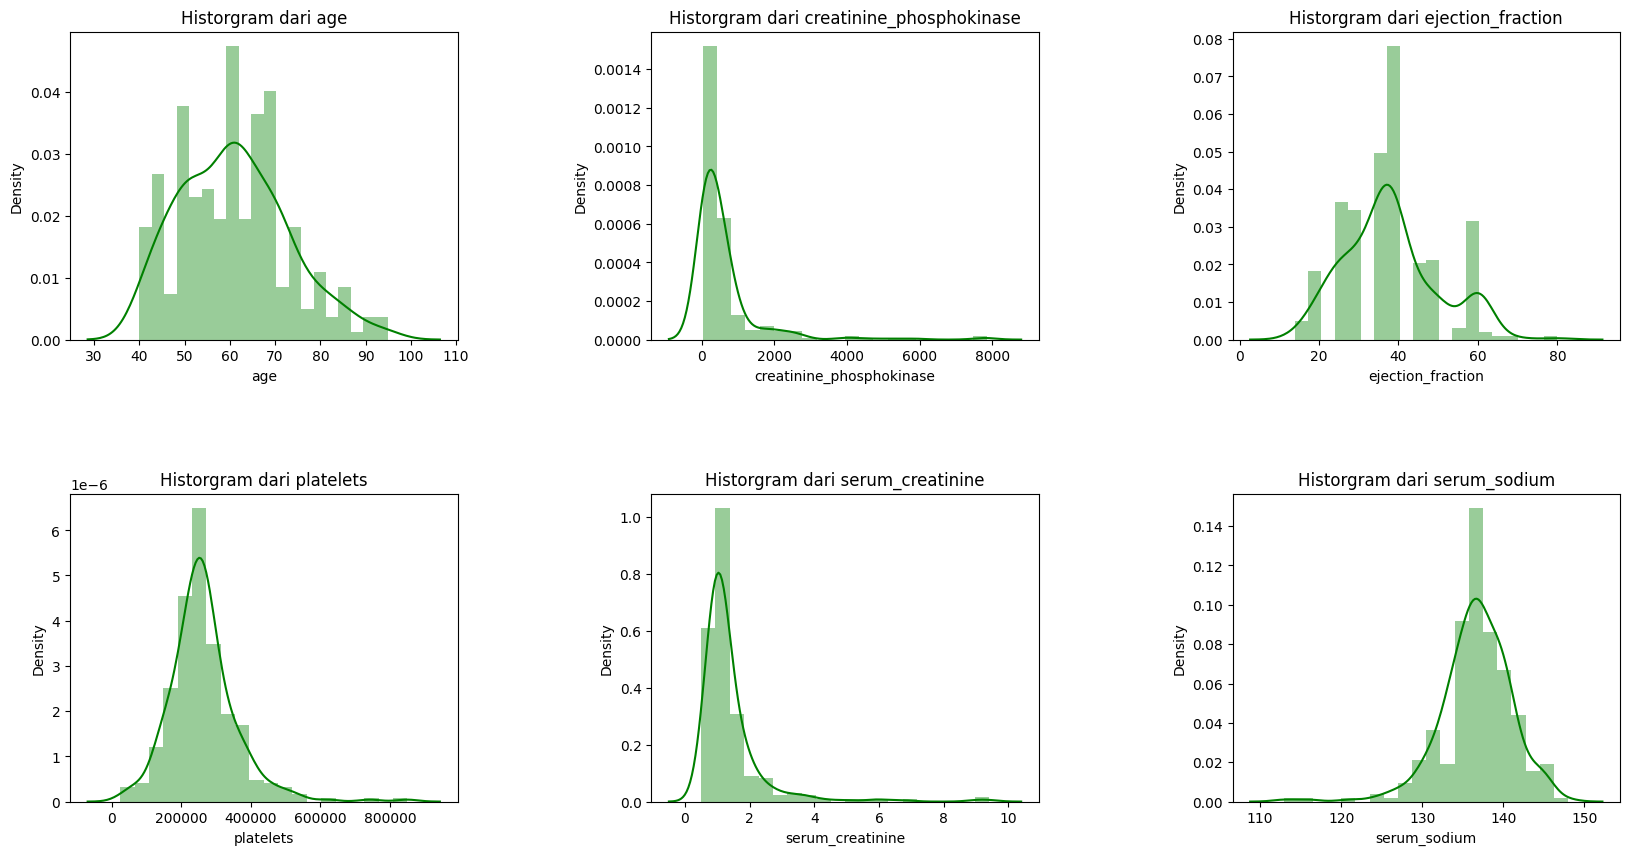

In [7]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(20,10))
count_=0
for i in conti_data:
    count_+=1
    plt.subplot(2   ,3  ,count_)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[i],bins=20,color='green')
    plt.title('Historgram dari {}'.format(i))
plt.show()

/tmp/ipykernel_2829/3895585437.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j][df['DEATH_EVENT']==0] ,bins=20,color='green',label='0')
/tmp/ipykernel_2829/3895585437.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[j][df['DEATH_EVENT']==1] ,bins=20,color='red',label='1')
/tmp/ipy

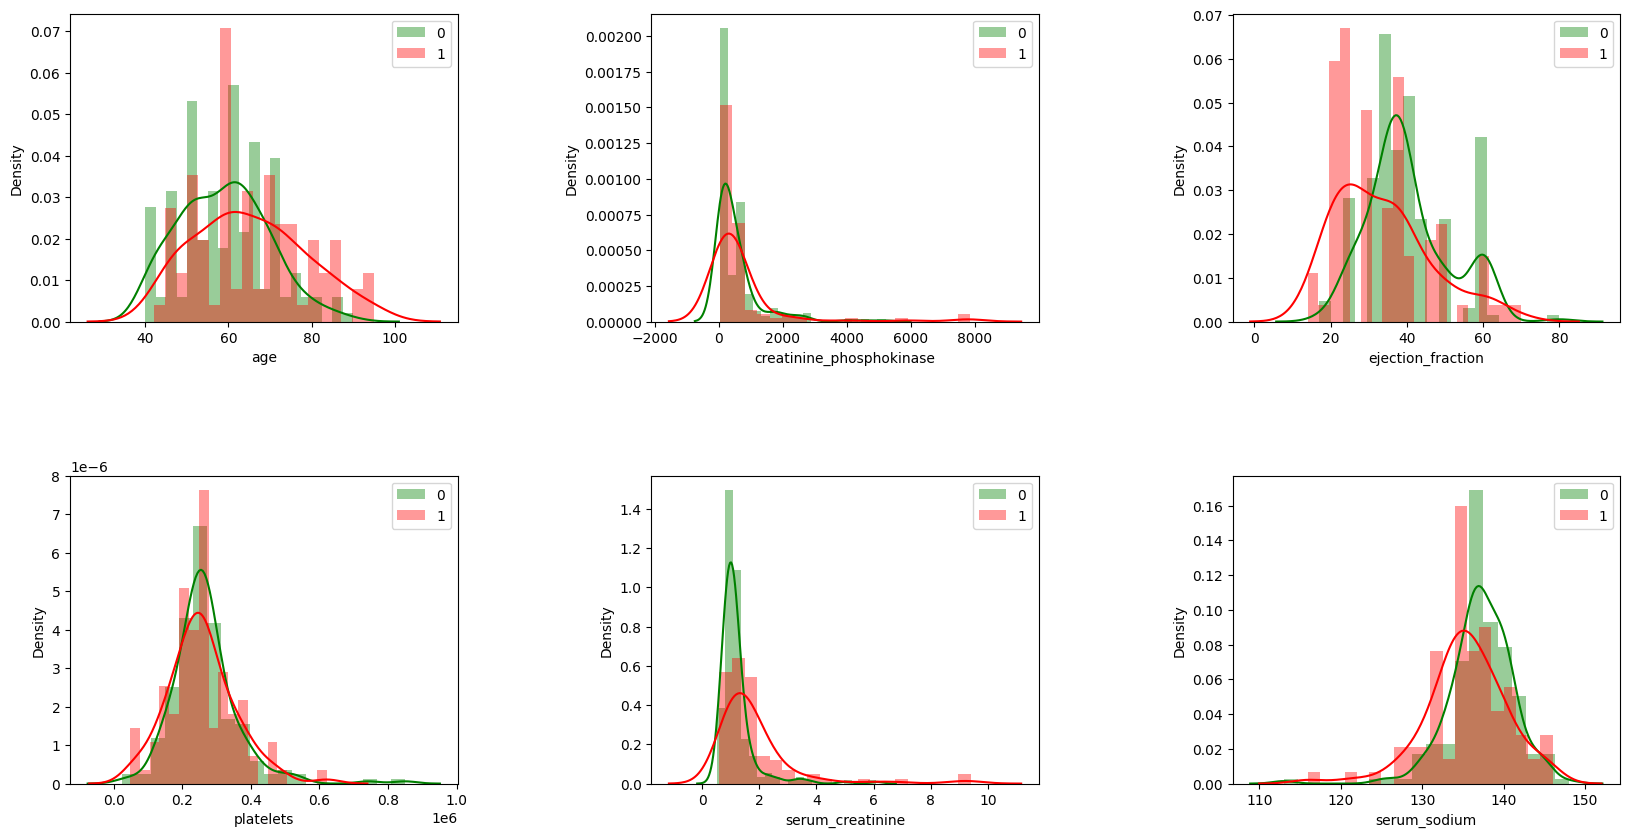

In [8]:
# histogram deattime when 1 is true and 0 is false
plt.figure(figsize=(20,10))
count_=0
for j in conti_data:
    count_+=1
    plt.subplot(2   ,3  ,count_)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[j][df['DEATH_EVENT']==0] ,bins=20,color='green',label='0')
    sns.distplot(df[j][df['DEATH_EVENT']==1] ,bins=20,color='red',label='1')
    plt.legend()
plt.show()

/tmp/ipykernel_2829/2381170428.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_value=df.corr()


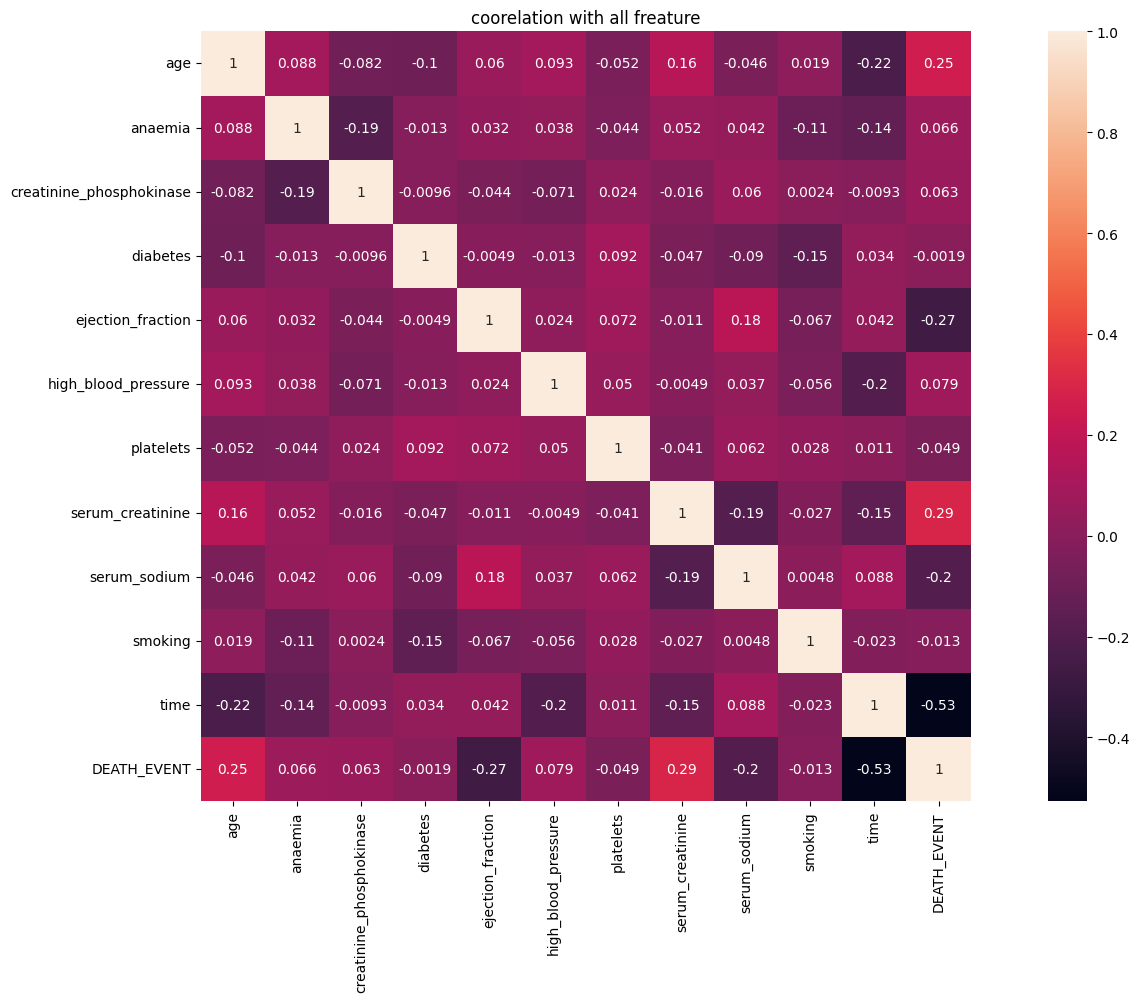

In [9]:
# kita lihat correali data dengan heatmap
corr_value=df.corr()
plt.figure(1,figsize=(20,10))
sns.heatmap(corr_value,annot=True,square=True)
plt.title("coorelation with all freature")
plt.show()

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
help(smf.ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model.
    data : array_like
        The data for the model. See Notes.
    subset : array_like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`.
    drop_cols : array_like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    *args
        Additional positional argument that are passed to the model.
    **kwargs
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironm

In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [13]:
help(smf.ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model.
    data : array_like
        The data for the model. See Notes.
    subset : array_like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`.
    drop_cols : array_like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    *args
        Additional positional argument that are passed to the model.
    **kwargs
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironm

In [14]:
# how linear regesion
modeling=smf.ols("DEATH_EVENT~ age+creatinine_phosphokinase+ejection_fraction+platelets+serum_creatinine+serum_sodium+anaemia+diabetes+high_blood_pressure+smoking",data=df).fit()
modeling.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     8.750
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           1.59e-12
Time:                        15:58:44   Log-Likelihood:                -156.86
No. Observations:                 299   AIC:                             335.7
Df Residuals:                     288   BIC:                             376.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.4460      0.793      1.824      0.069      -0.115       3.007
age                          0.0088      0.002      4.230      0.000       0.005       0.013
creatinine_phosphokinase  4.668e-05   2.55e-05      1.828      0.069   -3.59e-06     9.7e-05
ejection_fraction           -0.0103      0.002     -4.937      0.000      -0.014      -0.006
platelets                 -3.61e-08    2.5e-07     -0.144      0.885   -5.28e-07    4.56e-07
serum_creatinine             0.1063      0.024      4.408      0.000       0.059       0.154
serum_sodium                -0.0109      0.006     -1.906      0.058      -0.022       0.000
anaemia                      0.0574      0.050      1.144      0.254      -0.041       0.156
diabetes                     0.0215      0.050      0.428      0.669      -0.077       0.120
high_blood_pressure          0.0725      0.051      1.421      0.156      -0.028       0.173
smoking                     -0.0135      0.053     -0.255      0.799      -0.117       0.090
==============================================================================
Omnibus:                       33.178   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.011
Skew:                           0.562   Prob(JB):                     1.01e-05
Kurtosis:                       2.235   Cond. No.                     9.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

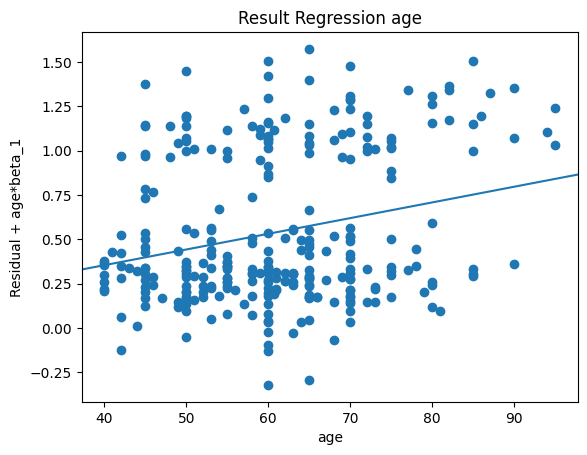

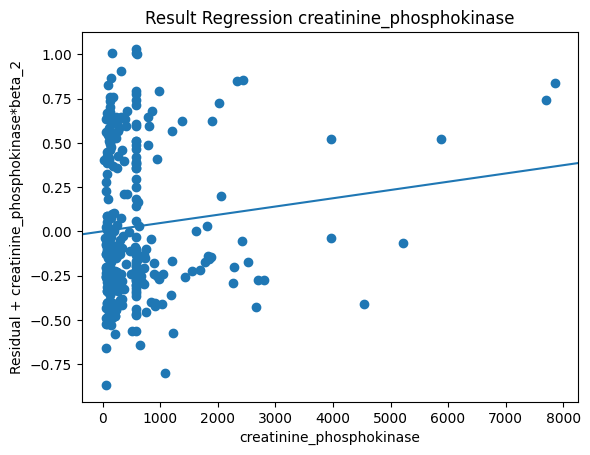

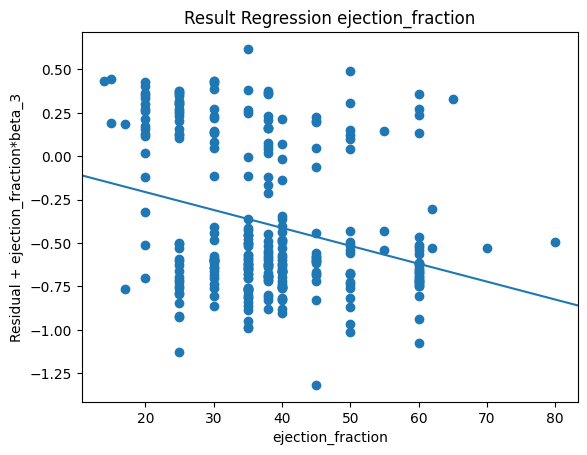

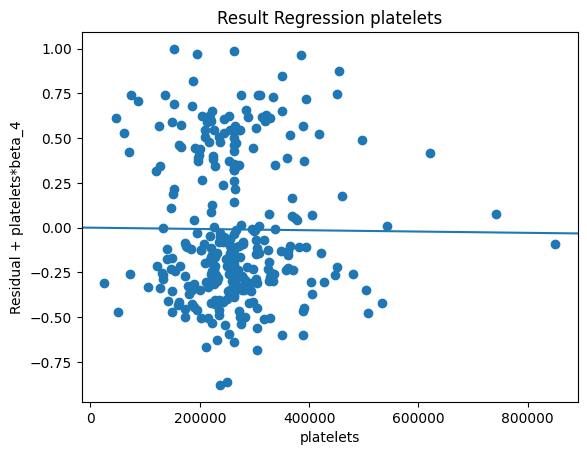

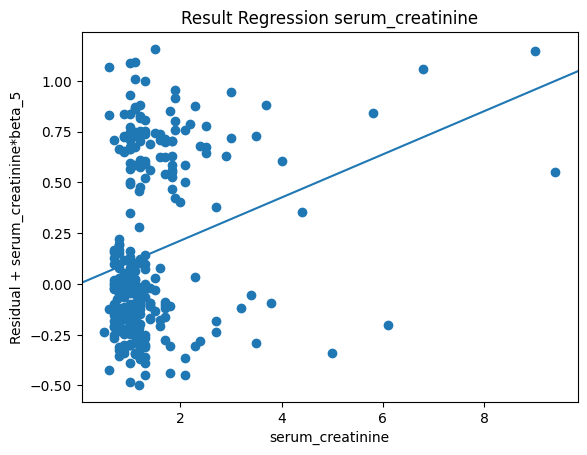

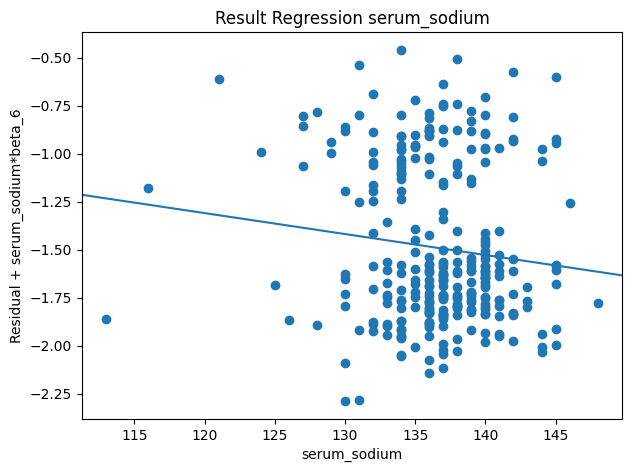

In [15]:
import statsmodels.api as sm
for x in conti_data:
    fig=sm.graphics.plot_ccpr(modeling,x)
    plt.title('Result Regression {}'.format(x))
fig.tight_layout(pad=1)

In [16]:
help(sm.graphics.plot_ccpr)

Help on function plot_ccpr in module statsmodels.graphics.regressionplots:

plot_ccpr(results, exog_idx, ax=None)
    Plot CCPR against one regressor.
    
    Generates a component and component-plus-residual (CCPR) plot.
    
    Parameters
    ----------
    results : result instance
        A regression results instance.
    exog_idx : {int, str}
        Exogenous, explanatory variable. If string is given, it should
        be the variable name that you want to use, and you can use arbitrary
        translations as with a formula.
    ax : AxesSubplot, optional
        If given, it is used to plot in instead of a new figure being
        created.
    
    Returns
    -------
    Figure
        If `ax` is None, the created figure.  Otherwise the figure to which
        `ax` is connected.
    
    See Also
    --------
    plot_ccpr_grid : Creates CCPR plot for multiple regressors in a plot grid.
    
    Notes
    -----
    The CCPR plot provides a way to judge the effect of one reg